# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
Data Validation task

<b>Data Validation</b>

The dataset contains 1500 rows and 8 columns with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

- booking_id : Same as description without missing values. Unique identifier
- months_as_member : Same as description without missing values. dtype is int64 so the values are discrete.
- weight : 20 missing values, so I decided to replace the missing values with overall average weight. Minimum value is 55.41 kg which is greater than minimum possible value for the column.
- days_before : No missing values but the dtype is object so the values are not discrete. I decided to change the dtype to int64 after removing ' days' from the relevant rows
- day_of_week : No missing values but there are 10 unique values instead of 7 so I decided to convert values such as Fri. to Fri etc. 
- time : Same as description without missing values, 2 ordinal categories
- category : 13 missing values in the form of '-' so I decided to convert them to 'unknown'
- attended : Same as description without missing values, 2 possible outcomes

In [2]:
#Modifications to the original dataset for data validation
import pandas as pd
data = pd.read_csv('fitness_class_2212.csv') #reading data
data['weight'].fillna(data['weight'].mean(), inplace = True) #filling missing values in the weight column
def rem_days(x):
    import re
    return re.search("\d+", x).group()
data['days_before'] = data['days_before'].apply(rem_days) # fixing day_before column so that it has discrete values
data['days_before'] = data['days_before'].astype('int64')# conversion to int dtype
#converting the data so that it is uniform for the 'day_of_week' column
data['day_of_week'] = data['day_of_week'].replace('Wednesday', 'Wed')
data['day_of_week'] = data['day_of_week'].replace('Fri.', 'Fri')
data['day_of_week'] = data['day_of_week'].replace('Monday', 'Mon')
data['category'] = data['category'].replace('-', 'unknown') # converting '-' to unkown to fix missing values in category

## Task 2
EDA

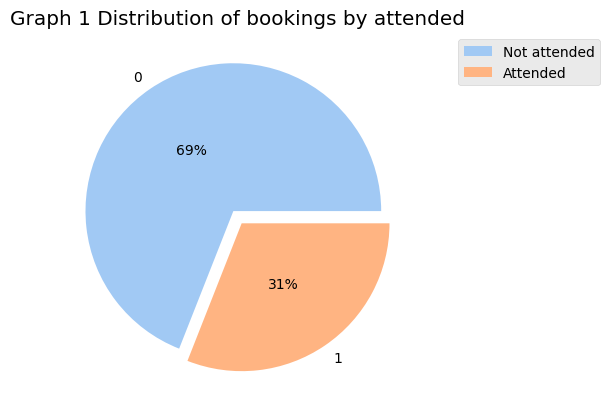

In [3]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
colors = sns.color_palette('pastel')[0:2]
#distribution of the target variable
pie_data = data.groupby('attended')['booking_id'].sum()
plt.pie(pie_data, labels = pie_data.keys(), colors = colors, autopct='%.0f%%', pctdistance=0.5, explode=[0.05]*2)
plt.title('Graph 1 Distribution of bookings by attended')
mylabels = ['Not attended', 'Attended']
plt.legend(labels = mylabels, bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()


As we can see, a higher number of bookings ended up not being attended.

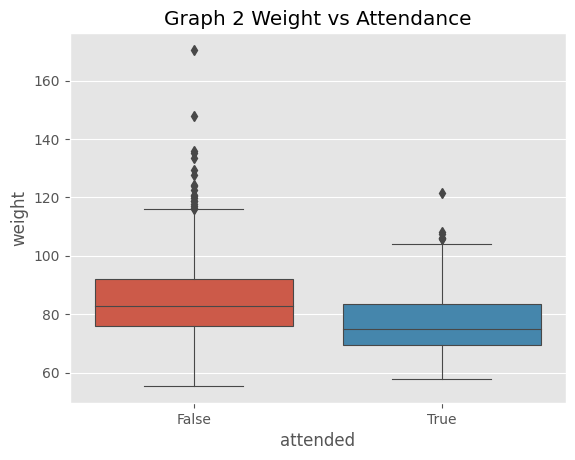

In [4]:
data['attended'] = data['attended'].astype('bool')
sns.boxplot(data=data, x='attended',y='weight',linewidth=0.8).set(title='Graph 2 Weight vs Attendance');

Inspecting the relationship between weight and attendance we found that the members who have lower weight are more likely to attend from graph 2. The lower weight could be because of regular gym sessions.

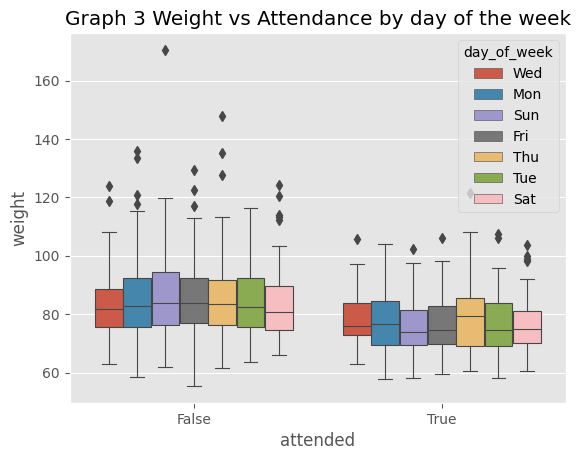

In [5]:
sns.boxplot(data=data, x='attended',y='weight', hue = 'day_of_week',linewidth=0.8).set(title='Graph 3 Weight vs Attendance by day of the week');

Inspecting the relationship between weight and attendance by day of the week we found that the observations were imbalanced

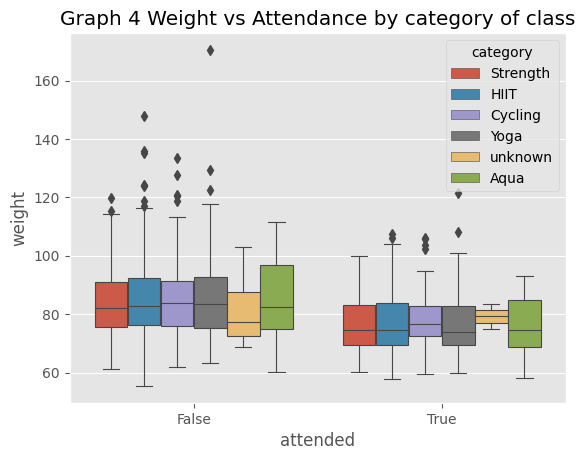

In [6]:
sns.boxplot(data=data, x='attended',y='weight', hue = 'category',linewidth=0.8).set(title='Graph 4 Weight vs Attendance by category of class');

Inspecting the relationship between weight and attendance by category of class, we found that the observations were imbalanced.

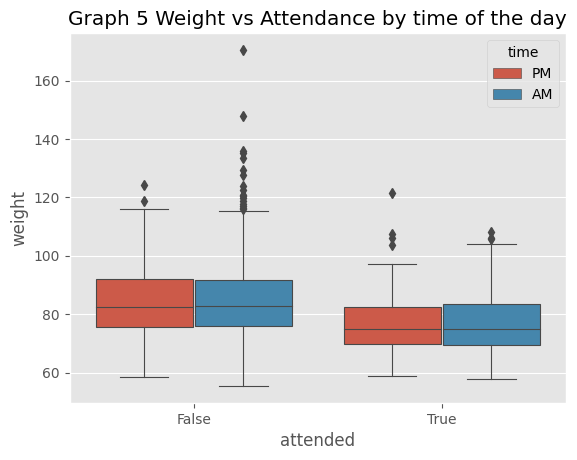

In [7]:
sns.boxplot(data=data, x='attended',y='weight', hue = 'time',linewidth=0.8).set(title='Graph 5 Weight vs Attendance by time of the day');

Inspecting the relationship between weight and attendance by time of the day, we found that the observations were not imbalanced much.

## Task 3
Distribution of the number of months as a member

<AxesSubplot:title={'center':'Graph 6 Distribution of months_as_member variable'}, ylabel='Frequency'>

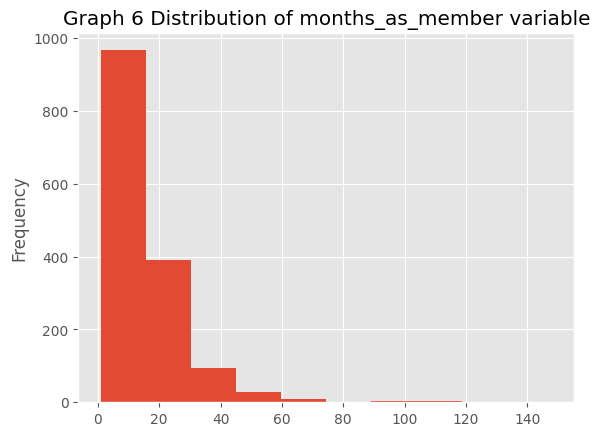

In [8]:
data['months_as_member'].plot(kind = 'hist', title = 'Graph 6 Distribution of months_as_member variable')

As we can see the distribution of the number of months as a member is right-skewed and unimodal.

## Task 4
The relationship between attendance and number of months as a member

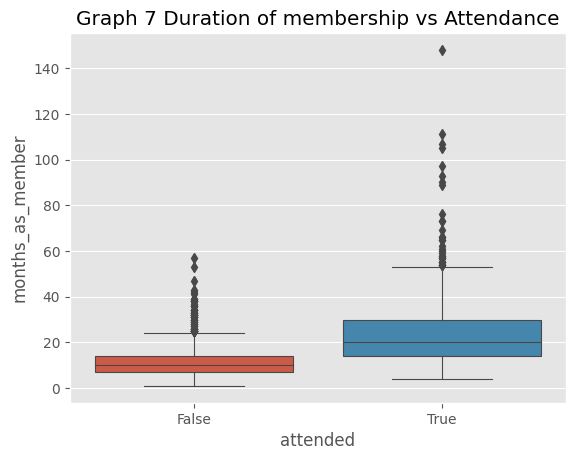

In [10]:
sns.boxplot(data=data, x='attended',y='months_as_member',linewidth=0.8).set(title='Graph 7 Duration of membership vs Attendance');

Inspecting the relationship between duration of membership and attendance, we found that the members who have had membership for a longer period of time are more likely to attend a booked session.

## Task 5
Type of problem

The business wants to predict whether members will attend using the data provided. Clearly, this is a binary classification problem where the members will either attend or not attend the booked session.

## Task 6
Baseline model

In [14]:
# Start coding here...
!pip install category_encoders # installing category_encoders package to encode categorical data
#importing the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
#splitting the data
X = data.drop('attended', axis = 1)
y = data['attended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 123)
#getting the data ready for modeling
import category_encoders as ce
encoder1 =ce.OrdinalEncoder(cols = ['day_of_week', 'time']) #encoding the ordinal categorical variables
encoder1.fit(X_train)
X_train = encoder1.transform(X_train)
X_test = encoder1.transform(X_test)
encoder2 = ce.CountEncoder(cols = ['category']) # encoding the nominal categorical variables
encoder2.fit(X_train)
X_train = encoder2.transform(X_train)
X_test = encoder2.transform(X_test)
X_train = X_train.drop('booking_id', axis = 1)# dropping booking_id as it is bound to have no relation with the target
X_test = X_test.drop('booking_id', axis = 1)
#LogisticRegressionModel
logreg = LogisticRegression()
logreg.fit(X_train, y_train) #fitting the baseline model
y_pred_1 = logreg.predict(X_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 115.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 109.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 57.5 MB/s eta 0:00:0000:0100:01
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 109.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 12.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take 

## Task 7
Comparison model

In [15]:
# Start coding here... 
#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train) #fitting the comparison model
y_pred_2 = rf.predict(X_test)

## Task 8
Reasons for choosing the models

I will be using Logistic Regression model as the baseline model for its simplicity and ease of interpretibility. Then I will use a RandomForestClassifier model as the comparison model since it is more versatile because of bootstrapping and an ensemble of decision trees.

## Task 9
Comparing the performance

In [17]:
# Start coding here... 

#Evaluating logistic regression model
print ('Logistic Regression Report')
print(classification_report(y_test, y_pred_1))

#Evaluating random forest model
print ('Random Forest Report')
print(classification_report(y_test, y_pred_2))

Logistic Regression Report
              precision    recall  f1-score   support

       False       0.75      0.92      0.83       253
        True       0.71      0.38      0.49       122

    accuracy                           0.75       375
   macro avg       0.73      0.65      0.66       375
weighted avg       0.74      0.75      0.72       375

Random Forest Report
              precision    recall  f1-score   support

       False       0.78      0.89      0.83       253
        True       0.68      0.49      0.57       122

    accuracy                           0.76       375
   macro avg       0.73      0.69      0.70       375
weighted avg       0.75      0.76      0.75       375



## Task 10
Conclusion:

In our business problem, a false positive will lead to a loss in revenue since another space will not be added when it should be while a false negative will lead to overcrowding at the fitness club. Since, both errors are equally serious, I chose accuracy as the metric for evaluation. 

We can see from the classification reports above that an untuned random forest model has slightly higher accuracy than the untuned logistic regression model. Therefore, the random forest model performs better and has a higher chance of giving correct predictions. We can focus on hyperparameter tuning of the random forest model and feature engineering in our data to get more accurate predictions.

The random forest model performs better because it does not overfit(bootstrapping) and it uses multiple decision trees(ensemble) to make the prediction.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam